In [100]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('index.csv')

In [102]:
df.sample(5)

,date,datetime,cash_type,card,money,coffee_name
951,2024-07-09,2024-07-09 16:42:59.535,card,ANON-0000-0000-0364,27.92,Americano with Milk
413,2024-05-06,2024-05-06 10:06:51.625,card,ANON-0000-0000-0149,37.72,Cappuccino
70,2024-03-09,2024-03-09 14:08:01.829,card,ANON-0000-0000-0009,33.80,Americano with Milk
760,2024-06-11,2024-06-11 21:28:50.220,card,ANON-0000-0000-0287,32.82,Americano with Milk
889,2024-06-29,2024-06-29 17:23:43.583,card,ANON-0000-0000-0335,37.72,Cappuccino


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         976 non-null    object 
 1   datetime     976 non-null    object 
 2   cash_type    976 non-null    object 
 3   card         887 non-null    object 
 4   money        976 non-null    float64
 5   coffee_name  976 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.9+ KB


In [104]:
df.duplicated().sum()

0

In [105]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [106]:
df['card'].value_counts()

card
ANON-0000-0000-0012    81
ANON-0000-0000-0009    57
ANON-0000-0000-0003    22
ANON-0000-0000-0097    20
ANON-0000-0000-0040    18
                       ..
ANON-0000-0000-0176     1
ANON-0000-0000-0181     1
ANON-0000-0000-0183     1
ANON-0000-0000-0184     1
ANON-0000-0000-0379     1
Name: count, Length: 379, dtype: int64

In [171]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [172]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,week,day,hour,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,9,1,10,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,9,1,12,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,9,1,12,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,9,1,13,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,9,1,13,Friday


In [109]:
df.describe()

,date,money,month,week,day,hour
count,976,976.000000,976.000000,976.0,976.000000,976.000000
mean,2024-05-08 15:47:12.786885376,33.879754,4.773566,18.95082,15.347336,14.679303
min,2024-03-01 00:00:00,23.020000,3.000000,9.0,1.000000,7.000000
25%,2024-04-07 00:00:00,28.900000,4.000000,14.0,8.000000,11.000000
50%,2024-05-15 00:00:00,33.800000,5.000000,20.0,15.000000,14.000000
75%,2024-06-07 06:00:00,37.720000,6.000000,23.0,22.250000,18.000000
max,2024-07-17 00:00:00,40.000000,7.000000,29.0,31.000000,22.000000
std,NaN,4.640887,1.247339,5.4447,8.632037,3.944827


In [110]:
df.describe(include='object')

,datetime,cash_type,card,coffee_name
count,976,976,887,976
unique,976,2,379,8
top,2024-03-01 10:15:50.520,card,ANON-0000-0000-0012,Americano with Milk
freq,1,887,81,227


D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


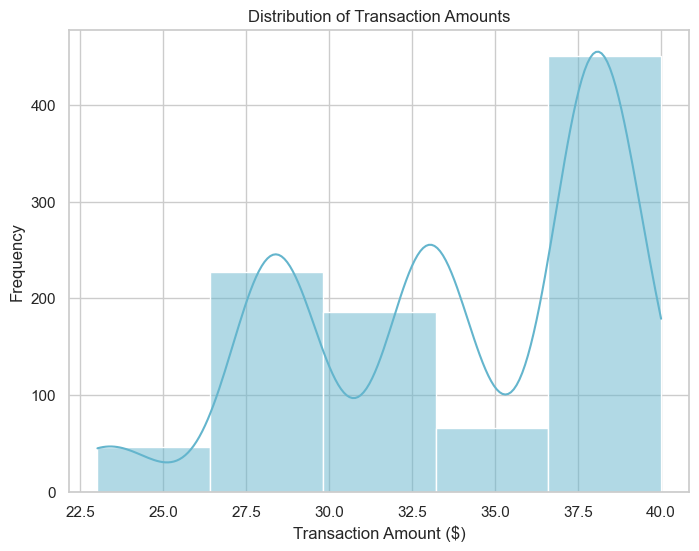

In [111]:
plt.figure(figsize=(8, 6))
sns.histplot(df['money'], bins=5, kde=True, color='c')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

## What are the total sales (in terms of revenue) over the given period? 


In [145]:
total_sales = df['money'].sum()
print(f"Total sales (in terms of revenue) over the given period: ${total_sales:.2f}")

Total sales (in terms of revenue) over the given period: $33066.64


# How do coffee sales vary by day, week, or month? 

In [114]:
sales_by_day = df.resample('D', on='date')['money'].sum()
sales_by_day.head()

date
2024-03-01    396.3
2024-03-02    228.1
2024-03-03    349.1
2024-03-04    135.2
2024-03-05    338.5
Freq: D, Name: money, dtype: float64

In [115]:
sales_by_month = df.resample('W', on='date')['money'].sum()
sales_by_month.head()

date
2024-03-03     973.5
2024-03-10    1840.5
2024-03-17    1516.3
2024-03-24    1307.8
2024-03-31    1412.1
Freq: W-SUN, Name: money, dtype: float64

In [116]:
sales_by_month = df.resample('M', on='date')['money'].sum()
sales_by_month.head()

date
2024-03-31    7050.20
2024-04-30    6720.56
2024-05-31    9063.42
2024-06-30    7758.76
2024-07-31    2473.70
Freq: M, Name: money, dtype: float64

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


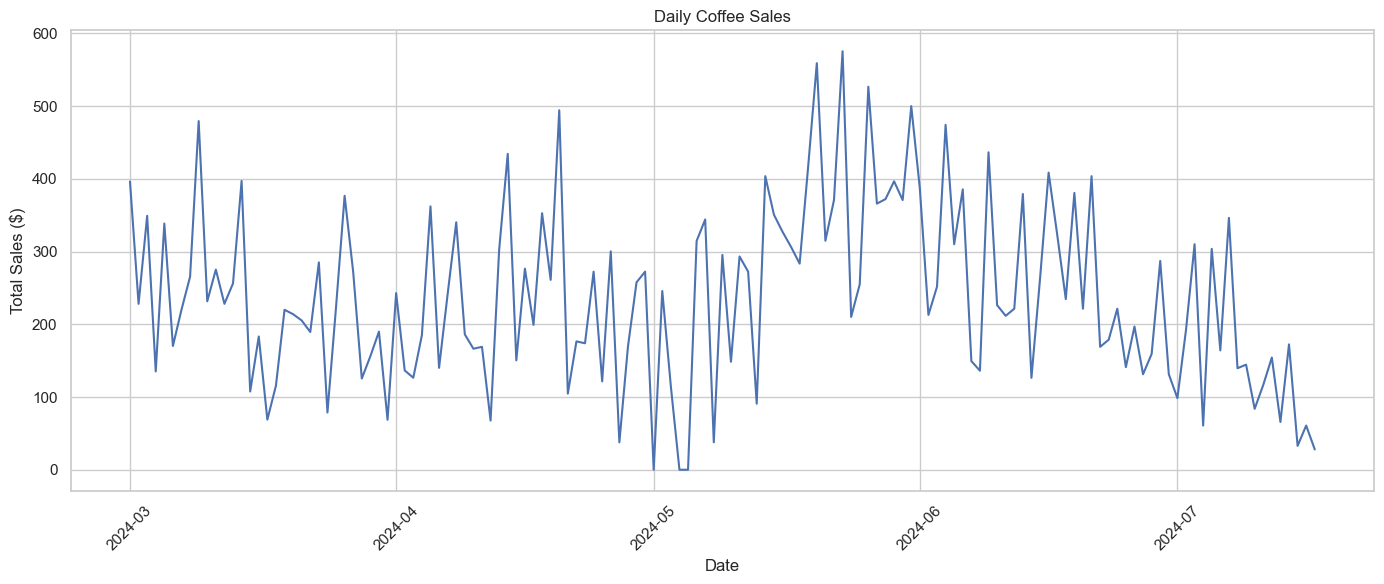

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


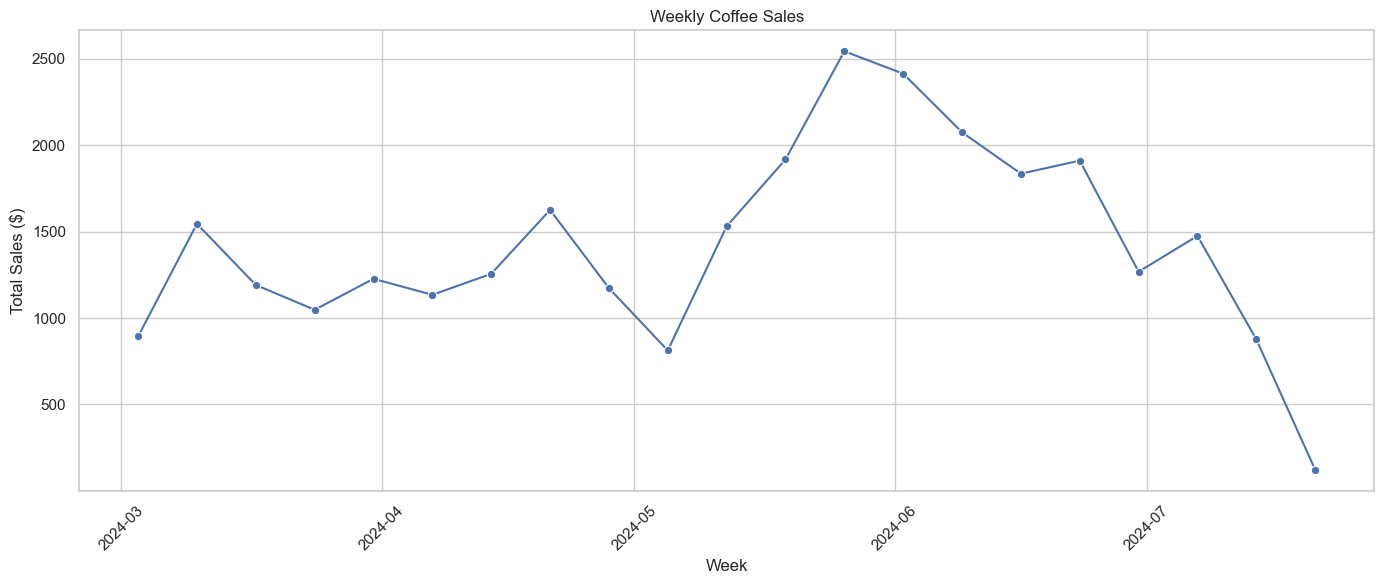

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


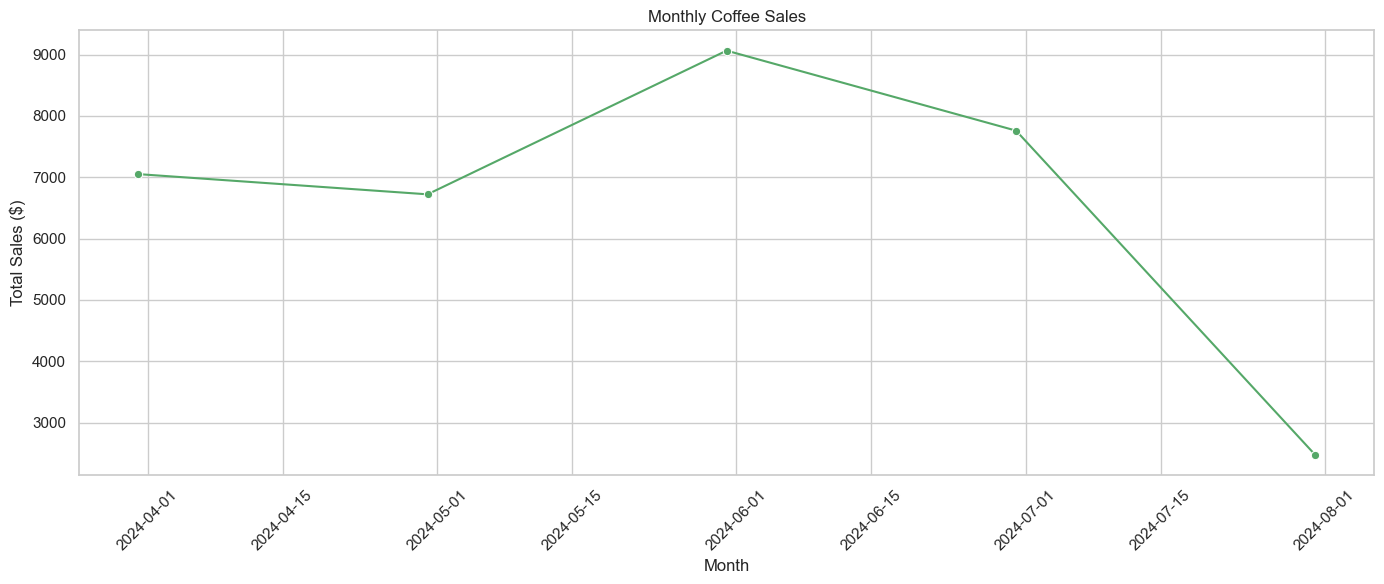

In [117]:

# Set style for the plots
sns.set(style='whitegrid')

# Plot sales by day
plt.figure(figsize=(14, 6))
sns.lineplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot sales by week
plt.figure(figsize=(14, 6))
sns.lineplot(x=sales_by_week.index, y=sales_by_week.values, marker='o')
plt.title('Weekly Coffee Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot sales by month
plt.figure(figsize=(14, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o', color='g')
plt.title('Monthly Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# What is the distribution of payment methods (cash vs. card) used by customers? 


In [138]:
payment_method_counts = df['cash_type'].value_counts()
payment_method_counts


cash_type
card    887
cash     89
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21f265a4e50>,
 [Text(-0.310832314936948, -1.0551697834902867, 'card'),
  Text(0.31083238903104127, 1.0551697616636175, 'cash')],
 [Text(-0.16954489905651707, -0.5755471546310653, '90.9%'),
  Text(0.16954493947147706, 0.5755471427256095, '9.1%')])

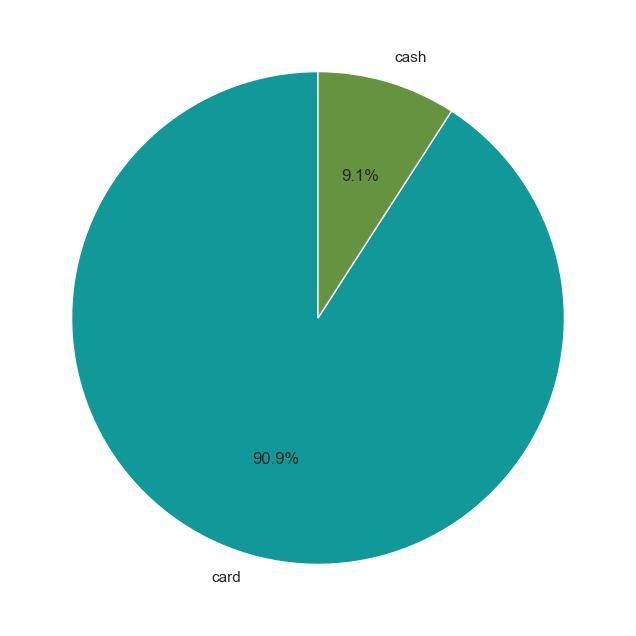

In [139]:

payment_method_percentages = payment_method_counts / payment_method_counts.sum() * 100

# Step 3: Visualize the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    payment_method_counts,
    labels=payment_method_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#119999','#66933F' ]
)

In [140]:
payment_method_counts = df['cash_type'].value_counts()
payment_method_counts

cash_type
card    887
cash     89
Name: count, dtype: int64

# Which coffee products are the most and least popular? 


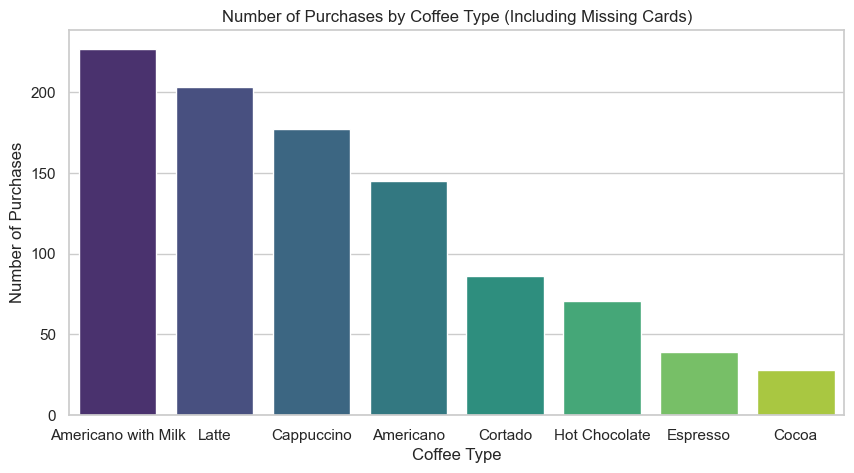

In [155]:
sns.set(style='whitegrid')

# Count plot for coffee types with missing card data considered
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='viridis')
plt.title('Number of Purchases by Coffee Type (Including Missing Cards)')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Purchases')
plt.show()

# During which times of the day are sales the highest and lowest? 


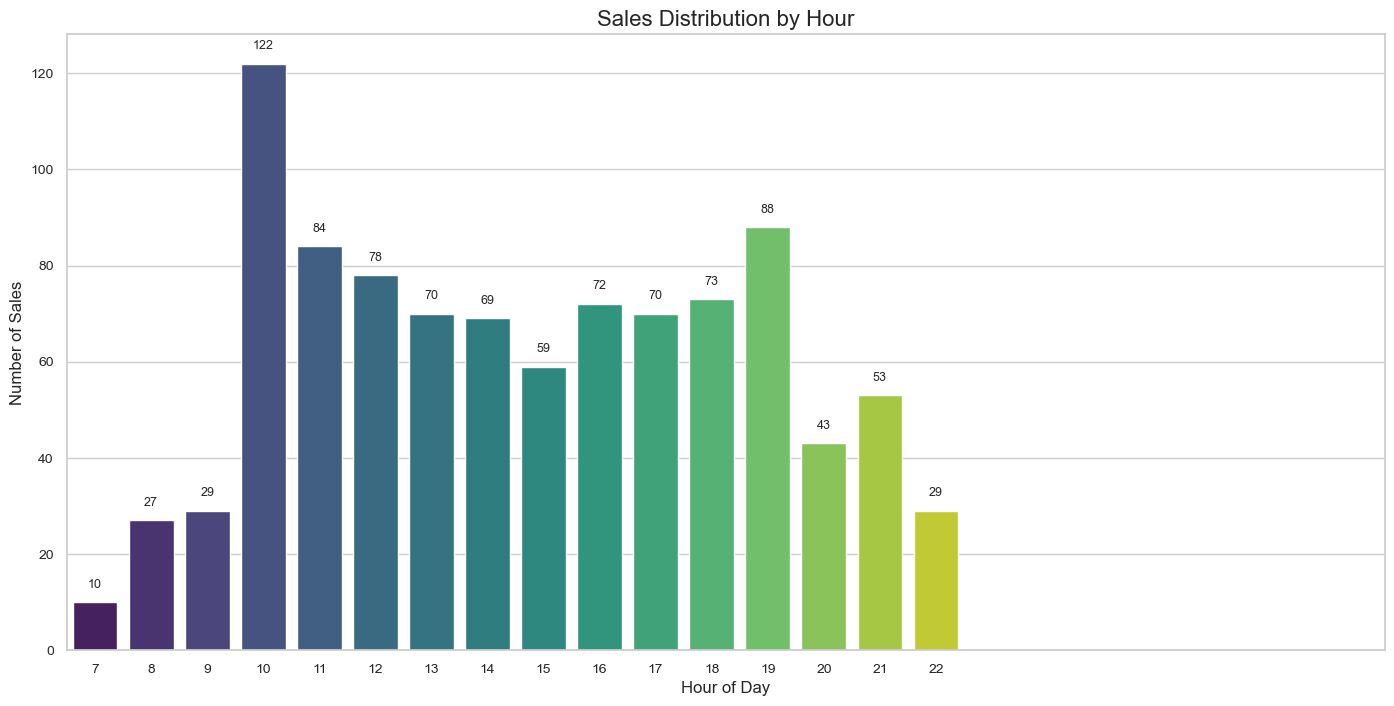

In [156]:
# Group by hour and count number of sales
hourly_sales = df.groupby('hour').size()

# Set up the figure and axis
plt.figure(figsize=(17, 8))

# Create a bar plot
ax = sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')

# Add titles and labels
plt.title('Sales Distribution by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.yticks(fontsize=10)

# Add annotations on the bars
for i, v in enumerate(hourly_sales.values):
    ax.text(i, v + 0.02 * max(hourly_sales.values), str(v), ha='center', va='bottom', fontsize=9)

# Display the plot
plt.show()

In [157]:
df['hour'].value_counts()

hour
10    122
19     88
11     84
12     78
18     73
16     72
13     70
17     70
14     69
15     59
21     53
20     43
9      29
22     29
8      27
7      10
Name: count, dtype: int64

# What is the total revenue generated by each coffee product? 


In [158]:
# Calculate total revenue for each coffee product
total_revenue_by_product = df.groupby('coffee_name')['money'].sum()

# Display the results
print(total_revenue_by_product)

coffee_name
Americano              4092.06
Americano with Milk    7457.22
Cappuccino             6709.56
Cocoa                  1066.20
Cortado                2445.82
Espresso                919.42
Hot Chocolate          2680.02
Latte                  7696.34
Name: money, dtype: float64


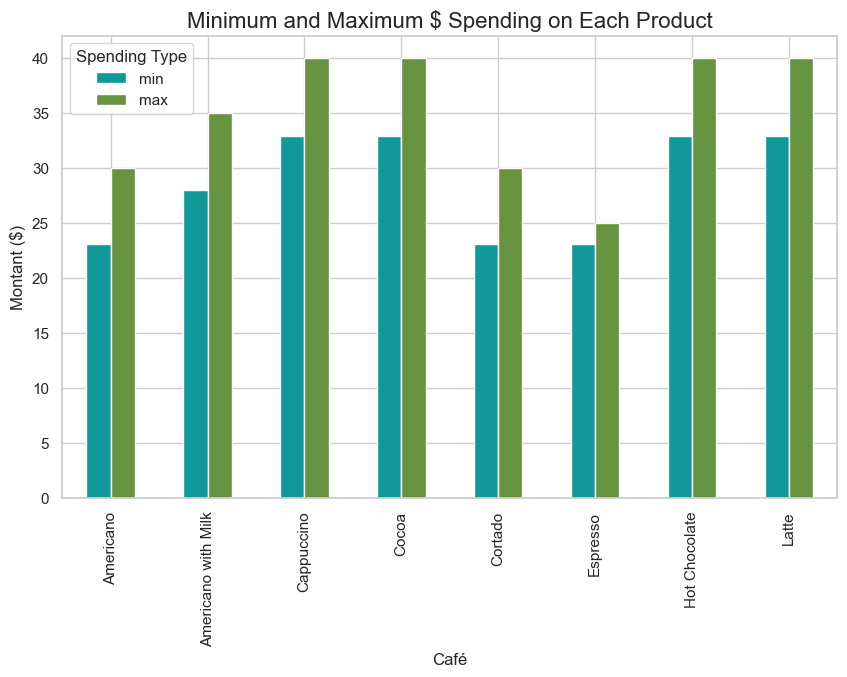

In [168]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for the bars
colors = ['#119999', '#66933F']  # Blue for min, Orange for max

# Plot with custom colors
coffee_stats.plot(kind='bar', ax=ax, color=colors)

# Set labels and title
ax.set_xlabel('Café', fontsize=12)
ax.set_ylabel('Montant ($)', fontsize=12)
ax.set_title('Minimum and Maximum $ Spending on Each Product', fontsize=16)
ax.legend(title='Spending Type')

# Display the plot
plt.show()

# Are there any patterns indicating repeat customers, especially based on card transactions? 


In [159]:
# Count the number of transactions per card
transaction_counts = df['card'].value_counts()

# Identify cards with more than one transaction
repeat_customers = transaction_counts[transaction_counts > 1]

# Display the results
print("Cards indicating repeat customers:")
print(repeat_customers)

# Optionally, display the total number of repeat customers
print(f"\nTotal number of repeat customers: {len(repeat_customers)}")

Cards indicating repeat customers:
card
ANON-0000-0000-0012    81
ANON-0000-0000-0009    57
ANON-0000-0000-0003    22
ANON-0000-0000-0097    20
ANON-0000-0000-0040    18
                       ..
ANON-0000-0000-0111     2
ANON-0000-0000-0051     2
ANON-0000-0000-0110     2
ANON-0000-0000-0047     2
ANON-0000-0000-0076     2
Name: count, Length: 139, dtype: int64

Total number of repeat customers: 139


card
ANON-0000-0000-0012    81
ANON-0000-0000-0009    57
ANON-0000-0000-0003    22
ANON-0000-0000-0097    20
ANON-0000-0000-0040    18
                       ..
ANON-0000-0000-0176     1
ANON-0000-0000-0181     1
ANON-0000-0000-0183     1
ANON-0000-0000-0184     1
ANON-0000-0000-0379     1
Name: count, Length: 379, dtype: int64

# How do sales vary by different days of the week? 


In [173]:
sales_by_day = df.groupby('day_of_week')['money'].sum()
sales_by_day

day_of_week
Friday       4681.94
Monday       4541.08
Saturday     4643.16
Sunday       4849.86
Thursday     4885.32
Tuesday      5102.06
Wednesday    4363.22
Name: money, dtype: float64

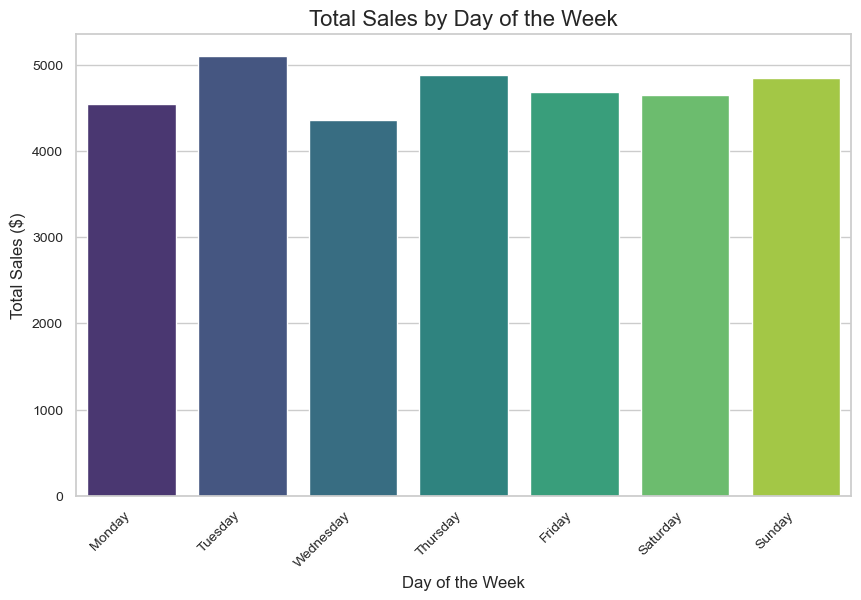

In [175]:
# Reorder days of the week to ensure correct plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(ordered_days)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()

# What is the total revenue generated from coffee sales, and is it meeting the target of $7000 per month? 

In [176]:
monthly_revenue = df.groupby('month')['money'].sum()

print("Total revenue per month:")
print(monthly_revenue)

Total revenue per month:
month
3    7050.20
4    6720.56
5    9063.42
6    7758.76
7    2473.70
Name: money, dtype: float64


In [177]:
target_revenue = 7000
meets_target = monthly_revenue >= target_revenue

# Display if each month meets the target
print("\nDoes each month's revenue meet the target?")
print(meets_target)

# Calculate overall total revenue
total_revenue = monthly_revenue.sum()
print(f"\nTotal revenue: ${total_revenue:.2f}")

# Check if overall revenue meets the target for each month
total_meets_target = total_revenue >= target_revenue * len(monthly_revenue)
print(f"\nOverall revenue meets the target for each month: {total_meets_target}")


Does each month's revenue meet the target?
month
3     True
4    False
5     True
6     True
7    False
Name: money, dtype: bool

Total revenue: $33066.64

Overall revenue meets the target for each month: False


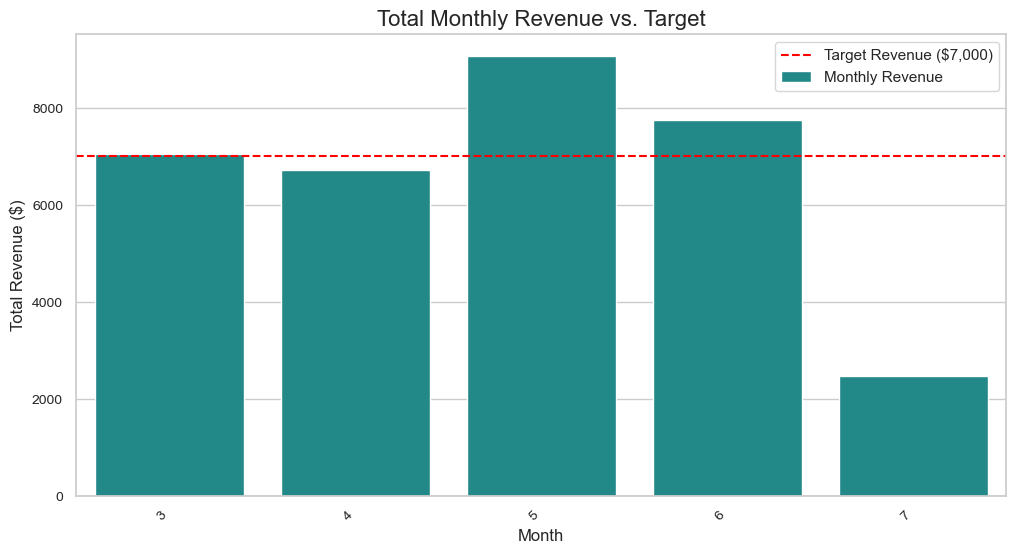

In [193]:
plt.figure(figsize=(12, 6))

# Create a bar plot for monthly revenue
sns.barplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, color='#119999', label='Monthly Revenue')

# Add a horizontal line for the target revenue
plt.axhline(y=target_revenue, color='red', linestyle='--', label='Target Revenue ($7,000)')
plt.title('Total Monthly Revenue vs. Target', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Display the plot
plt.show()

## How is the monthly sales growth rate, and is it achieving the target growth of 5% month over month 

Monthly Sales Growth Rate (%):
month
3          NaN
4    -4.675612
5    34.861083
6   -14.394787
7   -68.117328
Name: money, dtype: float64

Growth Rate Meets Target (5%):
month
3    False
4    False
5     True
6    False
7    False
Name: money, dtype: bool


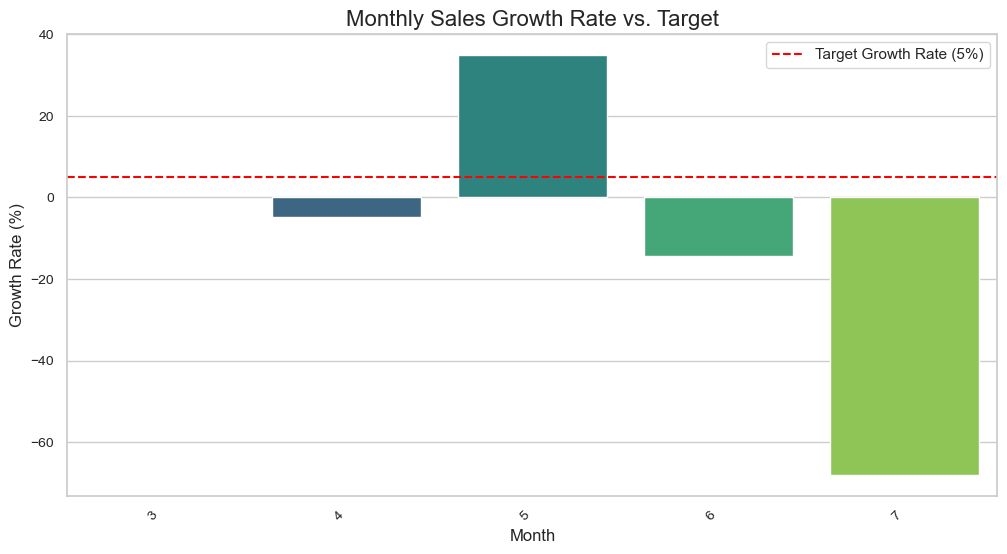

In [194]:
monthly_revenue = df.groupby('month')['money'].sum()

# Calculate month-over-month growth rate
monthly_growth = monthly_revenue.pct_change() * 100

# Define target growth rate
target_growth_rate = 5

# Check if each month's growth rate meets the target
growth_meets_target = monthly_growth >= target_growth_rate

# Print growth rates and target comparison
print("Monthly Sales Growth Rate (%):")
print(monthly_growth)
print("\nGrowth Rate Meets Target (5%):")
print(growth_meets_target)

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot for growth rates
sns.barplot(x=monthly_growth.index.astype(str), y=monthly_growth.values, palette='viridis')

# Add a horizontal line for the target growth rate
plt.axhline(y=target_growth_rate, color='red', linestyle='--', label='Target Growth Rate (5%)')

# Add titles and labels
plt.title('Monthly Sales Growth Rate vs. Target', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Display the plot
plt.show()

# Which are the top 3 best-selling coffee products, and how much revenue do they contribute to the total sales each month?

Top 3 Best-Selling Coffee Products:
coffee_name
Latte                  7696.34
Americano with Milk    7457.22
Cappuccino             6709.56
Name: money, dtype: float64

Monthly Revenue Contributions of Top 3 Products:
coffee_name  Americano with Milk  Cappuccino    Latte
month                                                
3                        1154.00      780.50  1874.50
4                        1407.74     1659.44  1193.12
5                        1908.28     2078.44  2198.00
6                        2268.12     1735.12  1886.00
7                         719.08      456.06   544.72


<Figure size 1200x600 with 0 Axes>

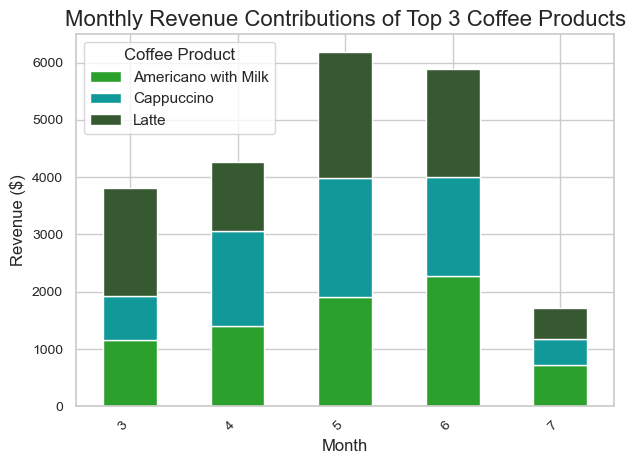

In [205]:
top_products = df.groupby('coffee_name')['money'].sum().nlargest(3)

print("Top 3 Best-Selling Coffee Products:")
print(top_products)

# Filter the data for the top 3 products
top_products_names = top_products.index
filtered_df = df[df['coffee_name'].isin(top_products_names)]

# Calculate monthly revenue contributions of the top 3 products
monthly_revenue_contributions = filtered_df.groupby(['month', 'coffee_name'])['money'].sum().unstack()

# Display monthly revenue contributions
print("\nMonthly Revenue Contributions of Top 3 Products:")
print(monthly_revenue_contributions)
colors = [ '#2ca02c','#119999', '#365932'] 

# Plotting the monthly revenue contributions
plt.figure(figsize=(12, 6))
monthly_revenue_contributions.plot(kind='bar', stacked=True ,  color = colors)
plt.title('Monthly Revenue Contributions of Top 3 Coffee Products', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10 )
plt.yticks(fontsize=10)
plt.legend(title='Coffee Product')
plt.tight_layout()

# Display the plot
plt.show()